# Logistic Regression Example

### Make datasets and test set
#### '<font color="blue">+</font>' points are sampled from a gaussian distribution (X, Y) ~ N(3, 6, 1, 1, 0).<br>'<font color="green">o</font>' points are sampled from a gaussian distribution (X, Y) ~ N(6, 3, 1, 1, 0)<br>make sure the shape of the data matrix with which you feed to the tensor correspond to the shape of the tensor

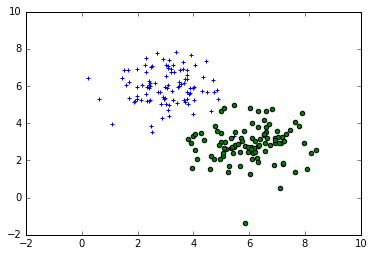

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

dot_num = 100
x_p = np.random.normal(3., 1, dot_num)
y_p = np.random.normal(6., 1, dot_num)
y = np.ones(dot_num)
C1 = np.array([x_p, y_p, y]).T

x_n = np.random.normal(6., 1, dot_num)
y_n = np.random.normal(3., 1, dot_num)
y = np.zeros(dot_num)
C2 = np.array([x_n, y_n, y]).T

plt.scatter(C1[:, 0], C1[:, 1], c='b', marker='+')
plt.scatter(C2[:, 0], C2[:, 1], c='g', marker='o')

data_set = np.concatenate((C1, C2), axis=0)
np.random.shuffle(data_set)


### Creating the graph and run it
#### In Graph building stage, python call tensorflow api to create Tensorflow Nodes and connect those Nodes. (at this moment the graph is static)<br>Note that in tensorflow Graph, <FONT COLOR="green">Nodes</FONT> are called <FONT COLOR="green">Operations</FONT> and <FONT COLOR="red">Edges</FONT> connect those Nodes are called <font color="red">tensors</font> 
#### A fetch on a tensor would require its preceeding Node to activate,  for a Node to activate would require all it's inbound tensors/Edges to be filled with data, recursively all the way to the leaf Nodes (placeholder, variable, constant)

In [2]:
################Graph building stage################
# Define placeholders for input
X = tf.placeholder(tf.float32, shape=(None, 2))
y = tf.placeholder(tf.float32, shape=(None, 1)) 

# Define variables to be learned
with tf.variable_scope("Logistic_regression"):
    W = tf.Variable(np.random.rand(2, 1), 'weight', dtype=tf.float32)
    b = tf.Variable(np.random.rand(1, 1), 'bias', dtype=tf.float32)
    
    logits = tf.matmul(X, W) + b
    pred = tf.sigmoid(logits)
    loss = tf.nn.sigmoid_cross_entropy_with_logits(logits, y)
    loss = tf.reduce_mean(loss)
#     y_hat = tf.sigmoid(logits)
#     loss = tf.reduce_mean(y * -tf.log(y_hat+1e-12) + (1 - y) * -tf.log(1 - y_hat+1e-12)) #cross entropy

opt = tf.train.AdamOptimizer(0.01)
opt_operation = opt.minimize(loss)
####################end of building graph###########
animation_fram = []

################Run/fetch the graph#################
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    for _ in xrange(500):
        _, loss_val = sess.run([opt_operation, loss], feed_dict={X: data_set[:, :2], y: data_set[:, 2].reshape((-1, 1))})
        W_opt, b_opt = sess.run([W, b])
        animation_fram.append((W_opt[0, 0], W_opt[1, 0], b_opt, loss_val))

### Visualizing the fitting process

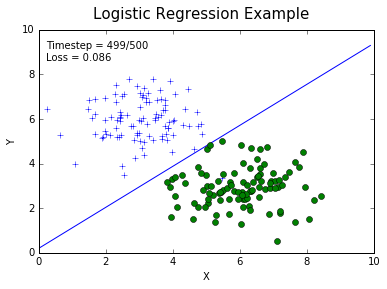

In [3]:

f, ax = plt.subplots(figsize=(6,4))
f.suptitle('Logistic Regression Example', fontsize=15)
plt.ylabel('Y')
plt.xlabel('X')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

line_d, = ax.plot([], [], label='fit_line')
C1_dots, = ax.plot([], [], '+', c='b', label='actual_dots')
C2_dots, = ax.plot([], [], 'o', c='g' ,label='actual_dots')


frame_text = ax.text(0.02, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes)
# ax.legend()

def init():
    line_d.set_data([],[])
    C1_dots.set_data([],[])
    C2_dots.set_data([],[])
    return (line_d,) + (C1_dots,) + (C2_dots,)

def animate(i):
    xx = np.arange(10, step=0.1)
    a = animation_fram[i][0]
    b = animation_fram[i][1]
    c = animation_fram[i][2]
    yy = a/-b * xx +c/-b
    line_d.set_data(xx, yy)
        
    C1_dots.set_data(C1[:, 0], C1[:, 1])
    C2_dots.set_data(C2[:, 0], C2[:, 1])
    
    frame_text.set_text('Timestep = %.1d/%.1d\nLoss = %.3f' % (i, len(animation_fram), animation_fram[i][3]))
    
    return (line_d,) + (C1_dots,) + (C2_dots,)

anim = animation.FuncAnimation(f, animate, init_func=init,
                               frames=len(animation_fram), interval=30, blit=True)

HTML(anim.to_html5_video())

